In [2]:
import os
import ast
import argparse
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/brat2/OneDrive/Desktop/bayesian-security-games/full_evaluation_results.csv")
df.head(5)


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/brat2/OneDrive/Desktop/bayesian-security-games/full_evaluation_results.csv'

In [ ]:
def parse_config(config_str):
    parts = config_str.split('_')
    return pd.Series({
        'opponent_policy': parts[0],
        'beta_level': int(parts[3]),
        'instance_number': int(parts[5])
    })

# Apply to your DataFrame (assuming the column is called 'config')
parsed_config = df['config_file'].apply(parse_config)

# Merge new columns into your original DataFrame
df = pd.concat([df, parsed_config], axis=1)
df.head(5)


,config_file,policy,replicate,seed,avg_comp_time,atk_avg_util,atk_tot_util,def_avg_util,def_tot_util,atk_action_dist,...,attacker_actions,defender_actions,latent_state_record,attacker_betas,defender_betas,attacker_utilities,defender_utilities,opponent_policy,beta_level,instance_number
0,ACRL_beta_level_0_instance_0,Boltzmann,0,1350207781,0.011231,-46.936600,-4693.6600,-88.048770,-8804.8770,"[0.19, 0.63, 0.18]",...,[1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0...,[0 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2...,[ 2.1608596 1.7380953 1.9228727 0.858432...,[19.24988 40.87861 26.513294 26.149883],[ 20. 50. 100. 0.1],[-149.56018 -170.06366 -167.86844 -169.9...,[-329.43253 -542.1616 -463.8022 -509.5...,ACRL,0,0
1,ACRL_beta_level_0_instance_0,Boltzmann,1,1883047816,0.000420,-18.381071,-1838.1070,3.592403,359.2403,"[0.12, 0.78, 0.1]",...,[0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1...,[0 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2...,[ 1.7062291 2.540755 3.0064495 2.6683676 ...,[19.24988 40.87861 26.513294 26.149883],[ 20. 50. 100. 0.1],[-172.2289 -144.58853 -156.08372 -158.3...,[-584.77185 -355.94702 -354.942 -410.0...,ACRL,0,0
2,ACRL_beta_level_0_instance_0,Boltzmann,2,2762946816,0.000430,-36.071570,-3607.1572,-72.155790,-7215.5796,"[0.16, 0.69, 0.15]",...,[0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1...,[0 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2...,[1.72151625e-03 1.63397360e+00 1.93024993e+00 ...,[19.24988 40.87861 26.513294 26.149883],[ 20. 50. 100. 0.1],[-190.03383 -153.84142 -169.18138 -173.5...,[-3.96814850e+02 -4.32141266e+02 -3.99462463e+...,ACRL,0,0
3,ACRL_beta_level_0_instance_0,Boltzmann,3,854423414,0.000423,-40.391360,-4039.1362,-73.612840,-7361.2840,"[0.16, 0.68, 0.16]",...,[1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0...,[0 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2...,[ 2.1754463 0.08578074 1.3677657 1.009232...,[19.24988 40.87861 26.513294 26.149883],[ 20. 50. 100. 0.1],[-147.57515 -191.5757 -172.65964 -16...,[-3.24682220e+02 -5.48790466e+02 -4.17498444e+...,ACRL,0,0
4,ACRL_beta_level_0_instance_0,Boltzmann,4,2981585160,0.000392,-39.193290,-3919.3290,-75.039444,-7503.9443,"[0.16, 0.69, 0.15]",...,[1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0...,[0 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2...,[ 2.7982037 2.7234073 2.0955687 1.518812...,[19.24988 40.87861 26.513294 26.149883],[ 20. 50. 100. 0.1],[-139.29651 -158.85344 -164.69841 -155.5...,[-356.46902 -424.1023 -418.1907 -455.1...,ACRL,0,0


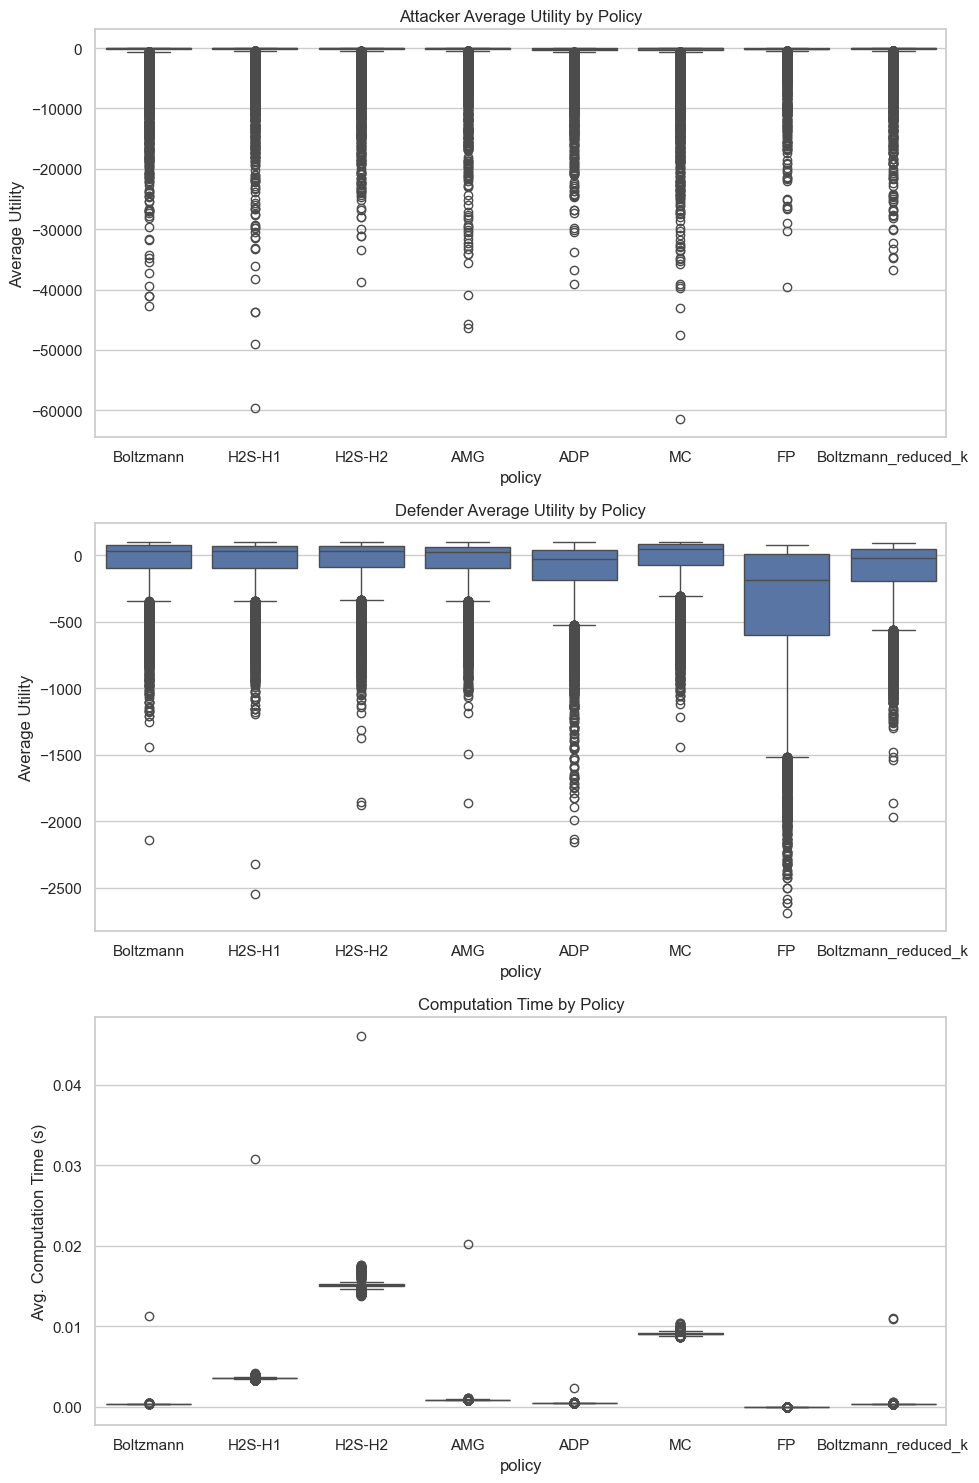

In [ ]:
# Convert relevant columns to numeric
df['atk_avg_util'] = pd.to_numeric(df['atk_avg_util'], errors='coerce')
df['def_avg_util'] = pd.to_numeric(df['def_avg_util'], errors='coerce')
df['avg_comp_time'] = pd.to_numeric(df['avg_comp_time'], errors='coerce')

# Set up a general style
sns.set(style="whitegrid")

# Create a grid of plots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot 1: Attacker and Defender Average Utility
sns.boxplot(data=df, x="policy", y="atk_avg_util", ax=axs[0])
axs[0].set_title("Attacker Average Utility by Policy")
axs[0].set_ylabel("Average Utility")

# Plot 2: Defender Average Utility
sns.boxplot(data=df, x="policy", y="def_avg_util", ax=axs[1])
axs[1].set_title("Defender Average Utility by Policy")
axs[1].set_ylabel("Average Utility")

# Plot 3: Average Computation Time
sns.boxplot(data=df, x="policy", y="avg_comp_time", ax=axs[2])
axs[2].set_title("Computation Time by Policy")
axs[2].set_ylabel("Avg. Computation Time (s)")

plt.tight_layout()
plt.show()

In [ ]:
summary_stats = df.groupby(["policy", "opponent_policy", "beta_level"])[["atk_avg_util", "def_avg_util", "avg_comp_time"]].agg(["mean", "std", "median"])
summary_stats


atk_avg_util                            \
                                          mean          std       median   
policy opponent_policy beta_level                                          
ADP    ACRL            0            -63.889131   167.664890   -21.031266   
                       1           -192.492253   323.217303  -100.989770   
                       2            -46.013218   240.630711     0.369987   
                       3           -131.356411   209.781497   -50.211633   
       CCRL            0            -90.337099   255.135252   -20.504078   
...                                        ...          ...          ...   
MC     RED             3           -281.361439   719.056503   -59.638945   
       WBL             0          -4168.981865  5087.570691 -2310.577900   
                       1           -987.370508  1756.947970  -144.603595   
                       2          -8331.541662  9121.638877 -5714.591750   
                       3          -2797.311316  3530.673232 -1381.780400   

                                  def_avg_util                         \
                                          mean         std     median   
policy opponent_policy beta_level                                       
ADP    ACRL            0           -142.420609  250.313278 -39.678370   
                       1           -108.123152  248.267028 -12.992536   
                       2           -142.782455  275.942506 -28.251890   
                       3           -147.864317  297.736147 -21.386300   
       CCRL            0           -122.509542  238.062531 -25.894253   
...                                        ...         ...        ...   
MC     RED             3            -59.883900  224.356536  45.883123   
       WBL             0            -26.023610  178.711371  59.924471   
                       1            -44.603069  191.106220  32.978554   
                       2            -56.493871  221.027551  47.614225   
                       3            -77.503253  235.891298  26.718672   

                                  avg_comp_time                      
                                           mean       std    median  
policy opponent_policy beta_level                                    
ADP    ACRL            0               0.000488  0.000084  0.000480  
                       1               0.000479  0.000004  0.000479  
                       2               0.000478  0.000004  0.000478  
                       3               0.000478  0.000004  0.000478  
       CCRL            0               0.000479  0.000004  0.000478  
...                                         ...       ...       ...  
MC     RED             3               0.009107  0.000120  0.009093  
       WBL             0               0.009096  0.000119  0.009092  
                       1               0.009099  0.000117  0.009094  
                       2               0.009108  0.000127  0.009109  
                       3               0.009142  0.000116  0.009141  

[128 rows x 9 columns]

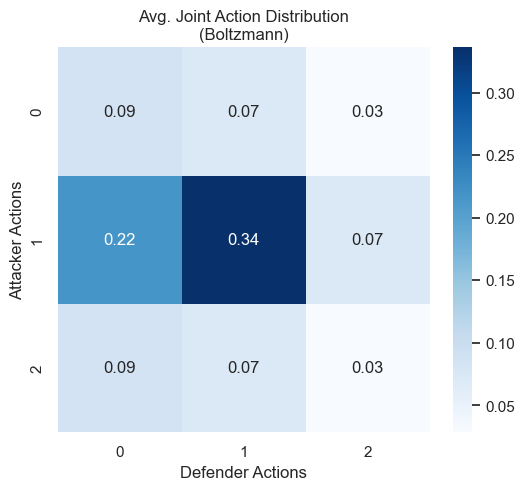

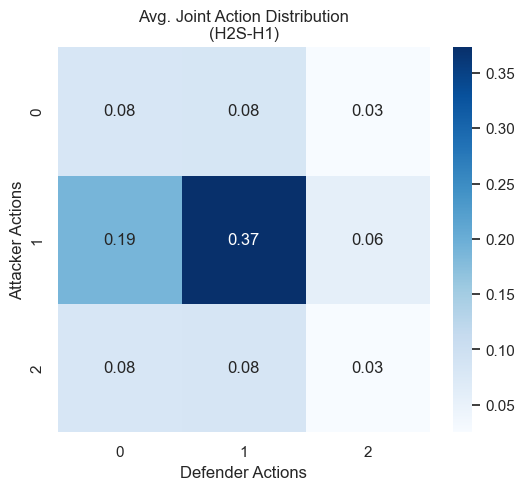

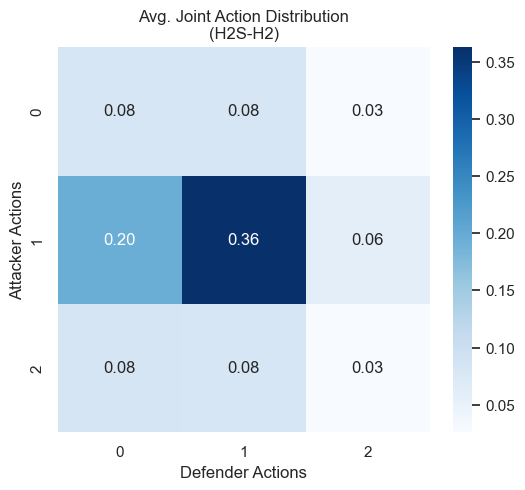

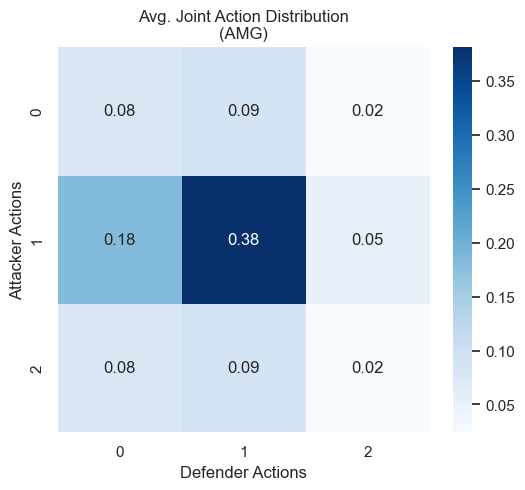

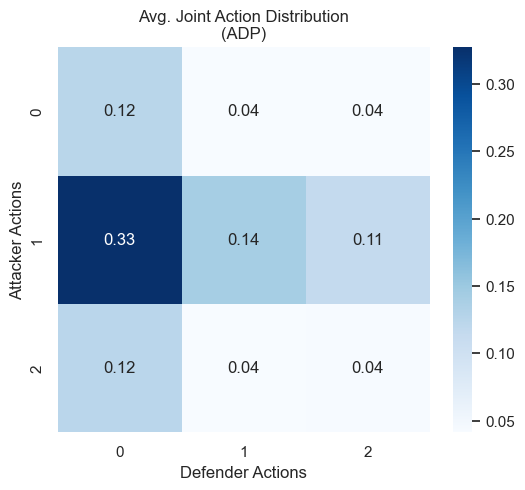

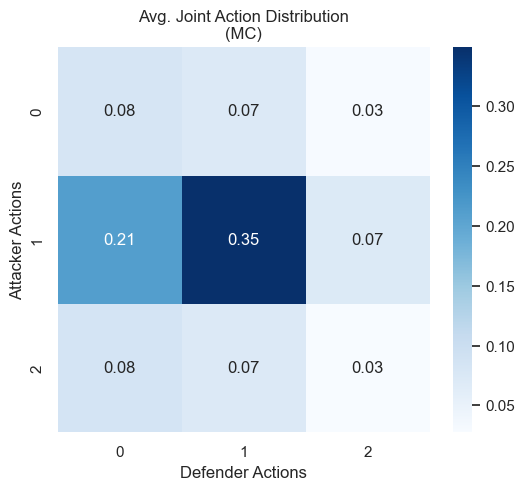

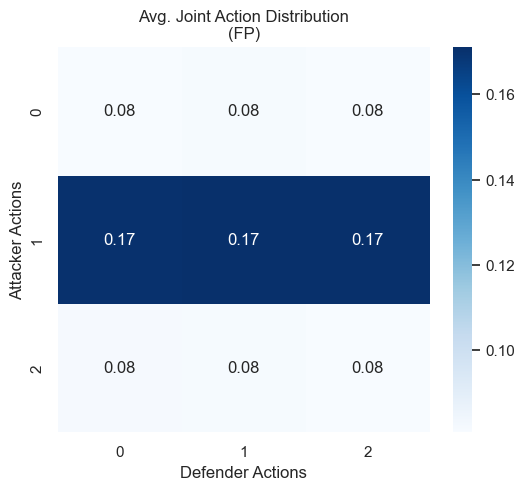

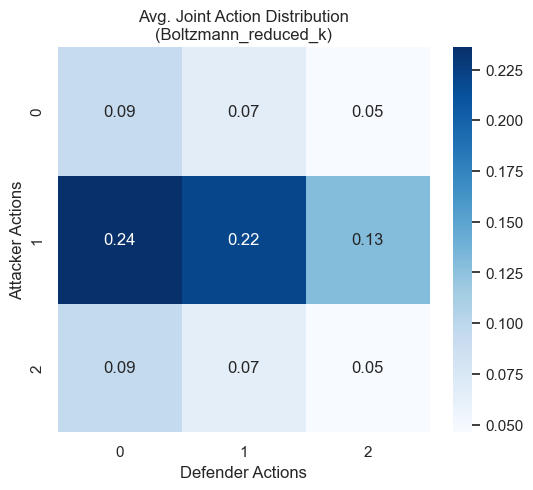

In [ ]:
# Convert string to 3x3 matrix
def parse_joint_matrix(row):
    try:
        return np.array(ast.literal_eval(row.strip()))
    except:
        return np.full((3, 3), np.nan)

# Plot average joint action distribution by policy
policies = df['policy'].unique()
for policy in policies:
    subset = df[df['policy'] == policy]
    joint_matrices = np.stack(subset['joint_action_dist'].dropna().apply(parse_joint_matrix))
    avg_joint_matrix = np.nanmean(joint_matrices, axis=0)

    plt.figure(figsize=(6, 5))
    sns.heatmap(avg_joint_matrix, annot=True, cmap="Blues", fmt=".2f", cbar=True)
    plt.title(f"Avg. Joint Action Distribution\n({policy})")
    plt.xlabel("Defender Actions")
    plt.ylabel("Attacker Actions")
    plt.show()

In [ ]:
print(df.columns)

Index(['config_file', 'policy', 'replicate', 'seed', 'avg_comp_time',
       'atk_avg_util', 'atk_tot_util', 'def_avg_util', 'def_tot_util',
       'atk_action_dist', 'def_action_dist', 'joint_action_dist',
       'time_in_def_bounds', 'time_in_atk_bounds', 'window_size', 'window_ids',
       'atk_win_means', 'def_win_means', 'adv_win_means', 'attacker_actions',
       'defender_actions', 'latent_state_record', 'attacker_betas',
       'defender_betas', 'attacker_utilities', 'defender_utilities',
       'opponent_policy', 'beta_level', 'instance_number'],
      dtype='object')


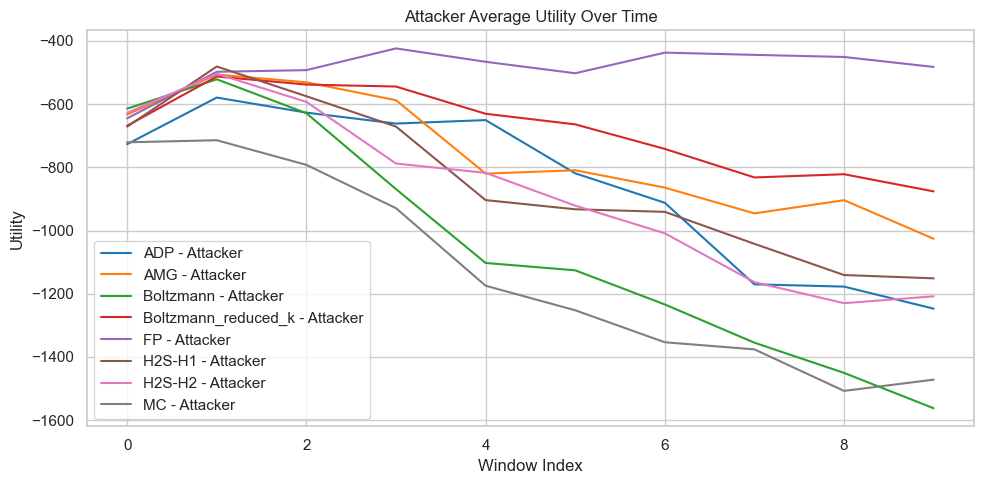

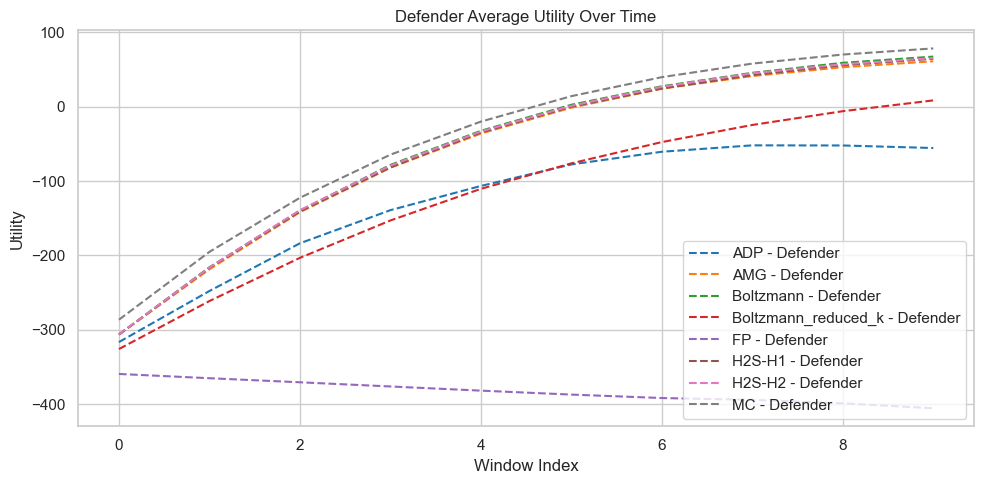

In [ ]:
# Safe eval in case columns are already parsed lists
def safe_eval(val):
    if isinstance(val, str):
        return ast.literal_eval(val)
    return val

# Clean column names and apply safe parsing
df.columns = df.columns.str.strip()
df['atk_win_means'] = df['atk_win_means'].apply(safe_eval)
df['def_win_means'] = df['def_win_means'].apply(safe_eval)

# Compute averages
atk_time_avg = df.groupby("policy")["atk_win_means"].apply(lambda x: np.mean(np.stack(x), axis=0))
def_time_avg = df.groupby("policy")["def_win_means"].apply(lambda x: np.mean(np.stack(x), axis=0))

# Colorblind-friendly palette (Tableau 10)
colors = plt.get_cmap("tab10").colors
color_map = {policy: colors[i % len(colors)] for i, policy in enumerate(atk_time_avg.index)}

# Plot 1: Attacker utility
plt.figure(figsize=(10, 5))
for i, policy in enumerate(atk_time_avg.index):
    plt.plot(atk_time_avg[policy], label=f"{policy} - Attacker", color=color_map[policy])
plt.title("Attacker Average Utility Over Time")
plt.xlabel("Window Index")
plt.ylabel("Utility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Defender utility
plt.figure(figsize=(10, 5))
for i, policy in enumerate(def_time_avg.index):
    plt.plot(def_time_avg[policy], label=f"{policy} - Defender", linestyle='--', color=color_map[policy])
plt.title("Defender Average Utility Over Time")
plt.xlabel("Window Index")
plt.ylabel("Utility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# sns.boxplot(data=df, x="policy", y="time_in_def_bounds")
# plt.title("Time in Defender Bounds by Policy")
# plt.ylabel("Timesteps in Bounds")
# plt.tight_layout()
# plt.show()

import seaborn as sns

# Extract beta level from config_file
df["beta_level"] = df["config_file"].str.extract(r"beta_level_(\d+)").astype(int)

sns.catplot(data=df, x="policy", y="time_in_def_bounds", kind="box", col="beta_level",
            col_wrap=3, sharey=True, height=4, aspect=1.2)

plt.subplots_adjust(top=0.9)
plt.suptitle("Time in Defender Bounds by Policy, Split by Beta Level")
plt.show()



NameError: name 'df' is not defined